In [1]:
import arlpy.uwapm as pm
import numpy as np
x         = np.linspace(-2000, 5000, 1080)
z         = np.linspace(0, 500,  720)

In [2]:
env = pm.make_env2d(
                
        name            = 'Example',
        
        # ALL: Receiver positions
        rx_range        = x,                                                   # m
        rx_depth        = z,                                                   # m
        
        # ALL: Source freq and depth
        tx_freq         = 75,                                             # Hz
        tx_depth        = 50,                                            # m

        # ALL: Bottom interface
        bot_interface   = np.column_stack((None, 450)),                 # m
                                                        
        # Acousto-elastic bottom boundary 
        bot_boundary    = 'acousto-elastic',
        bot_roughness   = 0.2,                                                 # m (rms)
        bot_density     = 2.3,                                                 # g/cm3
        bot_PwaveSpeed  = 6000,                                                # m/s 
        bot_SwaveSpeed  = 3500,                                                # m/s 
        bot_PwaveAttn   = 0.02,                                                # dB/wavelength 
        bot_SwaveAttn   = 0.02,                                                # dB/wavelength 
        )

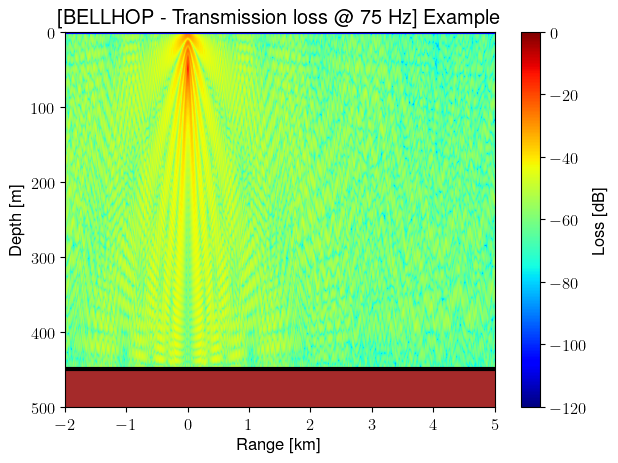

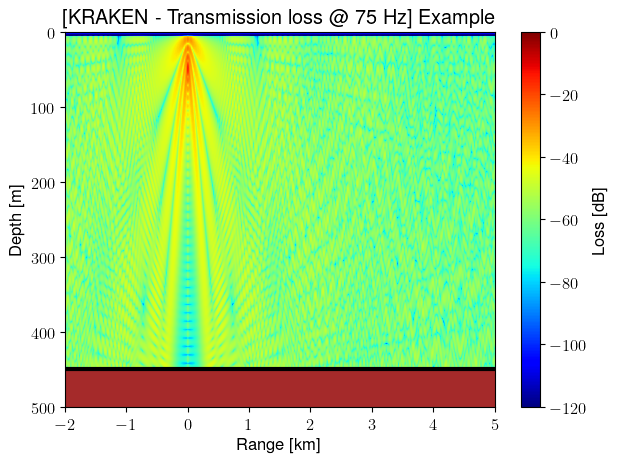

[WARNING] RAM: Output grid range is not 0 centered, maximum relative error = 4.634 m !


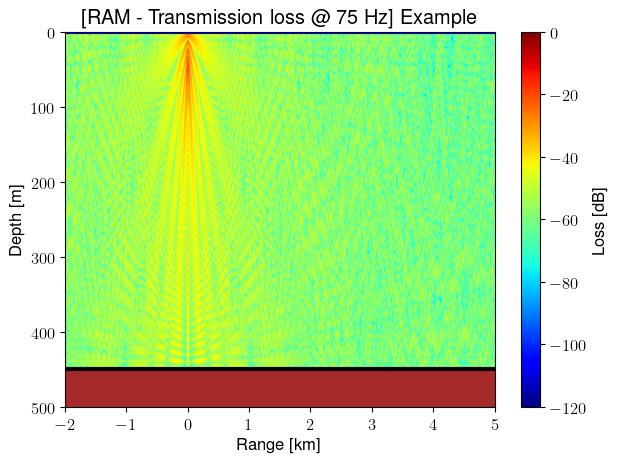

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[RAM - Transmission loss @ 75 Hz] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [3]:
BELLHOP = pm.BELLHOP(env)
BELLHOP.compute_transmission_loss()
BELLHOP.plot_transmission_loss()

KRAKEN = pm.KRAKEN(env)
KRAKEN.compute_transmission_loss()
KRAKEN.plot_transmission_loss()

RAM = pm.RAM(env)
RAM.compute_transmission_loss()
RAM.plot_transmission_loss()

In [4]:
pm.print_env(env)

                name : Example
           attn_unit : dB/wavelength
       bot_PwaveAttn : 0.02
      bot_PwaveSpeed : 6000
       bot_SwaveAttn : 0.02
      bot_SwaveSpeed : 3500
        bot_boundary : acousto-elastic
         bot_density : 2.3
           bot_depth : 0
       bot_interface : [[  0. 450.]]
           bot_range : 0
       bot_roughness : 0.2
           dimension : 2D
                mode : coherent
              nmedia : 1
               nmode : 999999999
       pad_inputData : True
            rx_depth : [  0.           0.69541029   1.39082058   2.08623088   2.78164117...
                       ...  497.21835883 497.91376912 498.60917942 499.30458971 500.        ]
            rx_range : [-2000.         -1993.51251158 -1987.02502317 ...  4987.02502317...
                       ...   4993.51251158  5000.        ]
                 ssp : [[1500]
                        [1500]]
           ssp_depth : [ -5.05  505.505]
          ssp_interp : c-linear
           ssp_range : 0

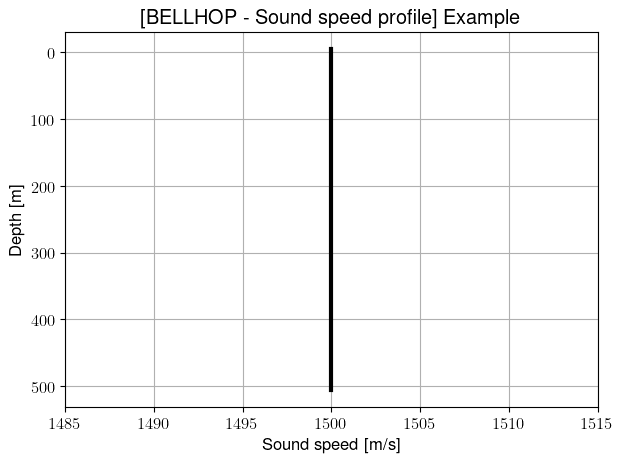

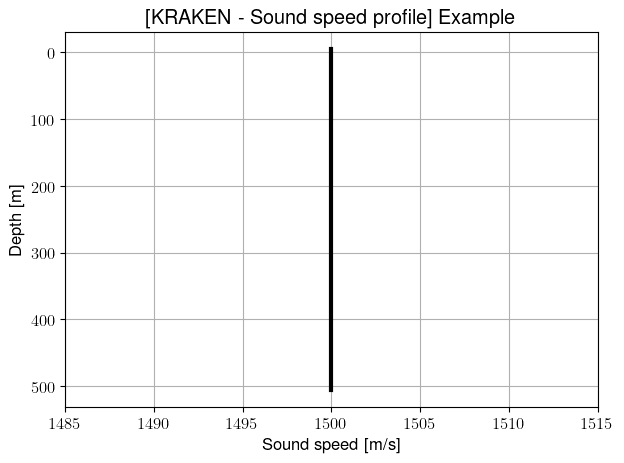

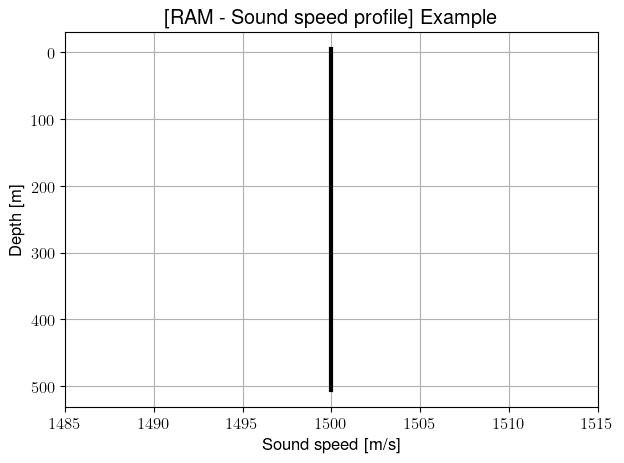

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[RAM - Sound speed profile] Example'}, xlabel='Sound speed [m/s]', ylabel='Depth [m]'>)

In [5]:
BELLHOP.plot_ssp()
KRAKEN.plot_ssp()
RAM.plot_ssp()

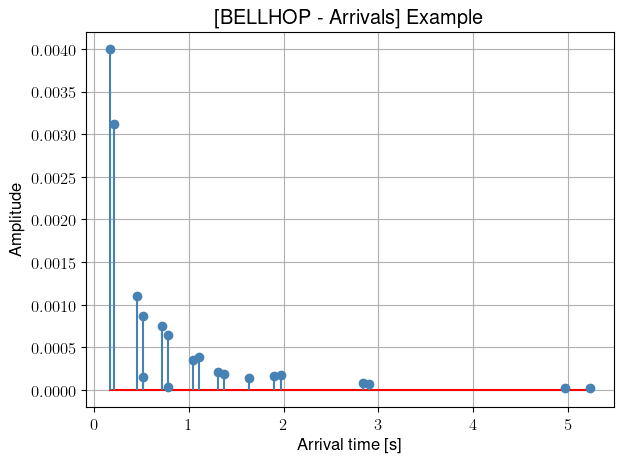

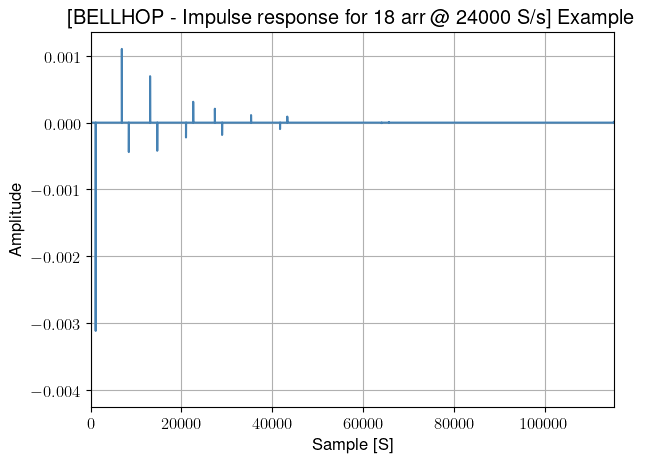

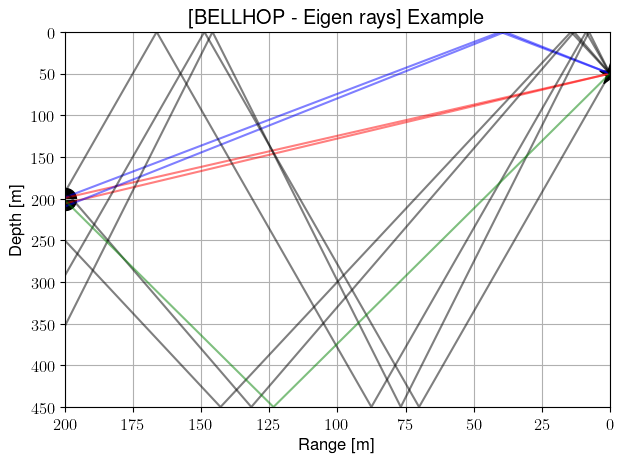

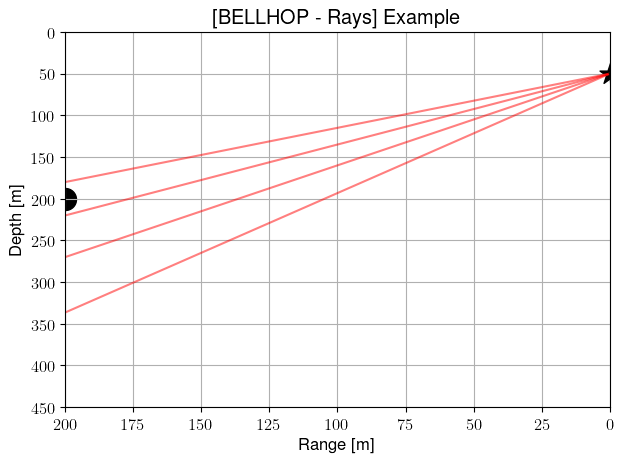

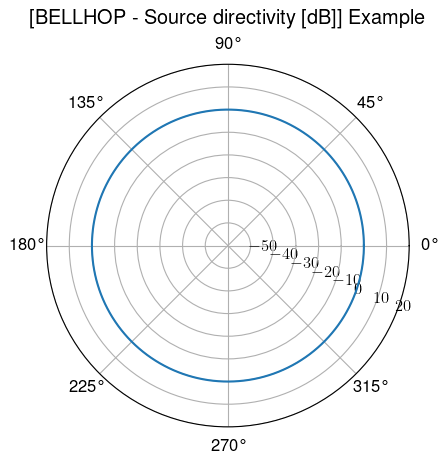

(<Figure size 640x480 with 1 Axes>,
 <PolarAxes: title={'center': '[BELLHOP - Source directivity [dB]] Example'}>)

In [6]:
env['rx_range'] = -200
env['rx_depth'] = 200
env = pm.make_env2d(**env)    
env = BELLHOP.set_env(env)

BELLHOP.compute_arrivals()
BELLHOP.compute_impulse_respsonse(fs=24000, nArrivals=100)
BELLHOP.compute_eigen_rays()
BELLHOP.compute_rays()

BELLHOP.plot_arrivals(nArrivals=50)  
BELLHOP.plot_impulse_response(nArrivals=50) 
BELLHOP.plot_eigen_rays()  
BELLHOP.plot_rays(number=8)   
BELLHOP.plot_beam()